In [26]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })

from pyScatt.Curve_Fit import ( fit_curve, _1Lorentzian  )
from scipy.optimize import curve_fit


# Define file path

In [2]:

inDir = '/home/group/Xray_Data/Brian/Beam Damage/circular_average/'


inDir = '/home/yuzhang/Results/Brian/'
outDir = '/home/yuzhang/Results/Brian/'
plotDir = '/home/yuzhang/Results/Brian/'



# Give data name

In [3]:
uid = 'BM_191024_PC1'
uid = 'BM_191025_PC2'

uid_list = np.sort( ls_dir( inDir, have_list=[   uid , 'csv'  ], exclude_list=['waxs', 'AgBH',  'png',
                                                                              '2606431', 
                                                                              '2606432',]) )  

print( len( uid_list ))
print( uid_list )

60
['BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000000_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000001_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000002_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000003_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000004_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000005_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000006_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000007_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000008_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000009_saxs.dat_q_Sq.csv'
 'BM_191025_PC2_new_period5s_307.0s_x0.000_y0.000_4.00s_2607158_000010_saxs.dat_q_Sq.csv'
 'BM_19

# Check one dataset

In [4]:
fp = uid_list[0]

In [5]:
#d = np.loadtxt( inDir + fp , skiprows=1, )
d = pds.read_csv( inDir + fp )
q = d['q_saxs']
iq = d['sq_saxs']

<IPython.core.display.Javascript object>


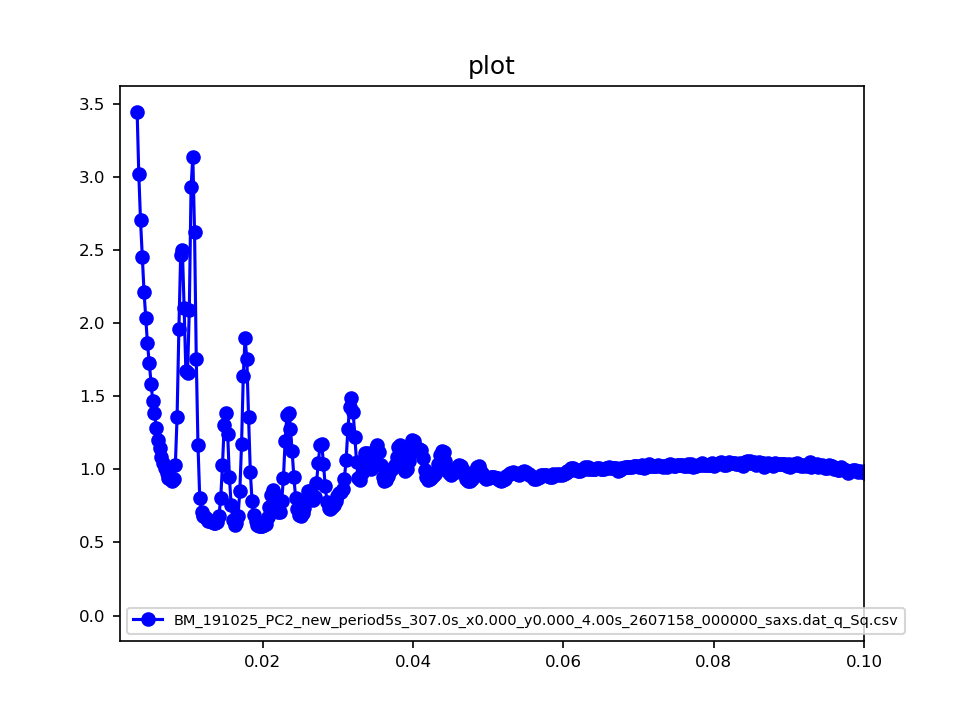

(0.001, 0.1)

In [6]:
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0

plot1D( x= q, y=iq, m=  markers[i], c= colors[i], ax=ax, legend= fp, legend_size = 7, logy=False, logx= False  )
#plot1D( x= q, y= .5e-4* q**-3 + 1.0 , m=  markers[i+1], c= colors[i+1], ax=ax, legend= fp, legend_size = 7, logy=True  )



ax.set_xlim( [0.001, 0.1 ])
#ax.set_ylim( [ -0.2, 1e3 ])


# Extract all the sq data

#### Extract data and save to a npz file just for convenience

In [7]:
if False:
#if True:    
    #q, iqs = get_series_data_dat( uid_list, inDir  )
    q, iqs = get_series_data_csv( uid_list, inDir  )
    np.savez( file=outDir + uid + 'iq',  q=q, iqs=iqs, )    


# Load one data 

In [8]:
uid = 'BM_191024_PC1'

uid = 'BM_191025_PC2'


In [9]:


#d=np.load(  outDir + uid + 'iq.npz')
d=np.load(  outDir + uid + 'iq.npz')
q,sqs = d['q'], d['iqs']


md={}
md[uid] = [  'empty_control' , 4 + 1 ,  sqs.shape[1] ]


print( uid )


BM_191025_PC2


# Plot the data

In [10]:
x1,x2=[0.001,0.1]
q1,q2 = find_index(q,x1 ),  find_index(q,x2)    

<IPython.core.display.Javascript object>


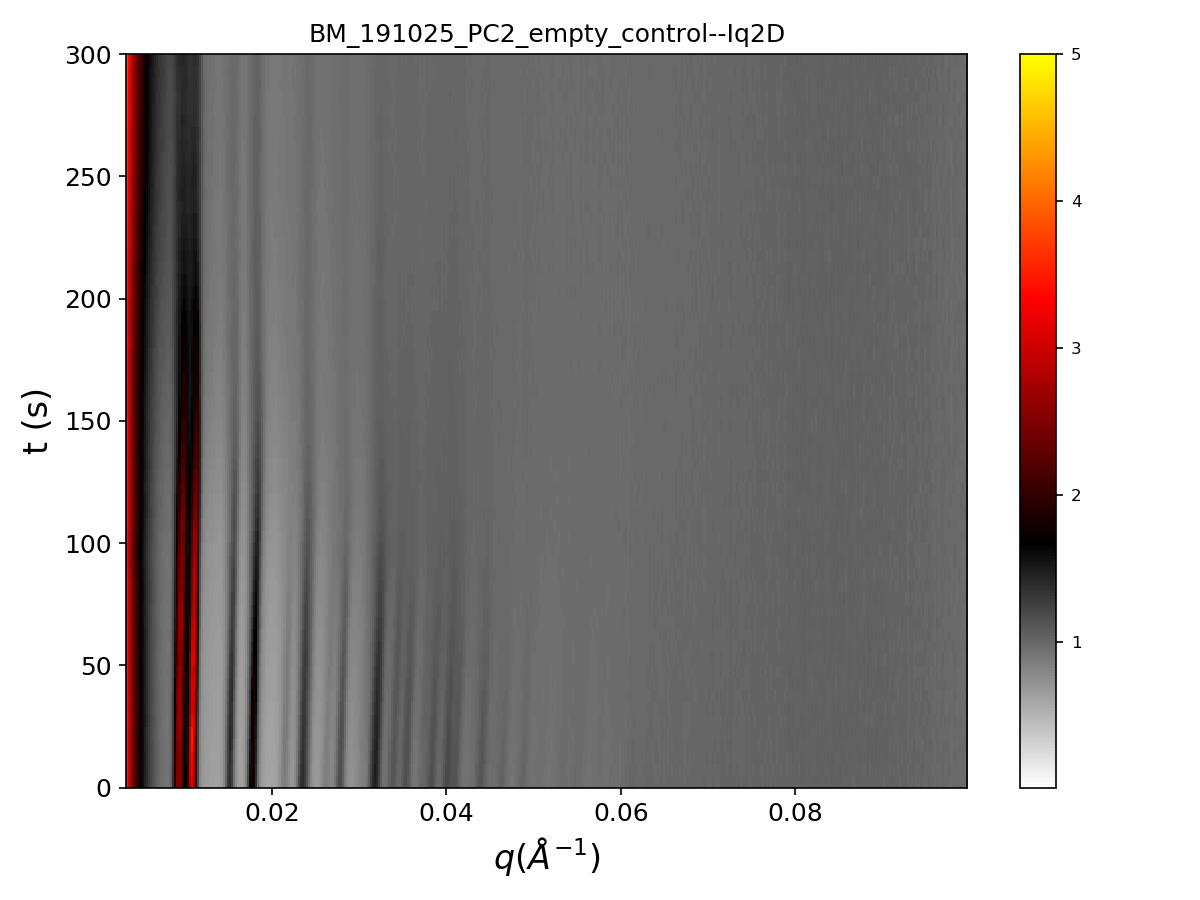

In [11]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( sqs[q1:q2].T, vmin=  .01, vmax=  5,   ax= [fig,ax], logs=False, show_colorbar=True,
          extent=[ q[q1:q2].min(), q[q1:q2].max(), 0,   md[uid][1] * md[uid][2]]  ,    
          xlabel=r'$q (\AA^{-1})$', ylabel='t (s)',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s--Iq2D'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_2D_Iq_%s.png'%(uid, md[uid][0] ))



<IPython.core.display.Javascript object>


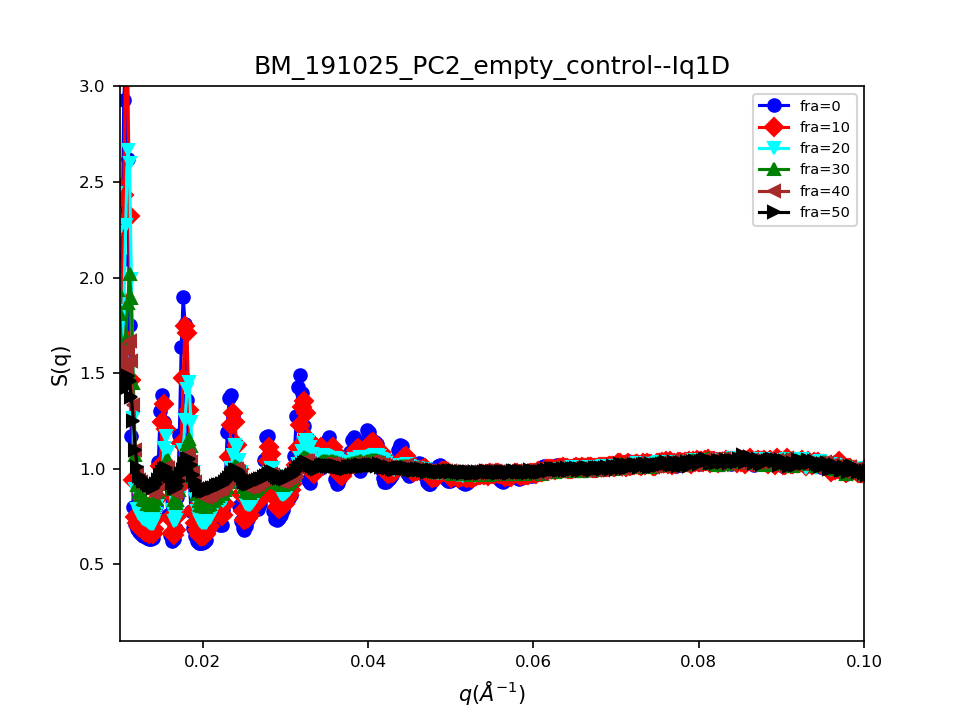

In [12]:
N = sqs.shape[1]
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0
for j in range( N ) [::10]:
    q = q
    #sq = np.abs( sqs[:,j] - a )
    sq =   sqs[:,j]  
    plot1D( x= q, y=sq, m=  markers[i], c= colors[i], ax=ax, legend= 'fra=%s'%j, legend_size = 7, logy= False  )
    i+=1    
ax.set_xlim( [0.01, 0.1 ])
ax.set_ylim( [ .1, 3])
ax.set_title( uid + '_%s--Iq1D'%md[uid][0] )
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel('S(q)')

plt.savefig( plotDir + 'uid=%s_1D_Sq_%s.png'%(uid, md[uid][0] ))



<IPython.core.display.Javascript object>


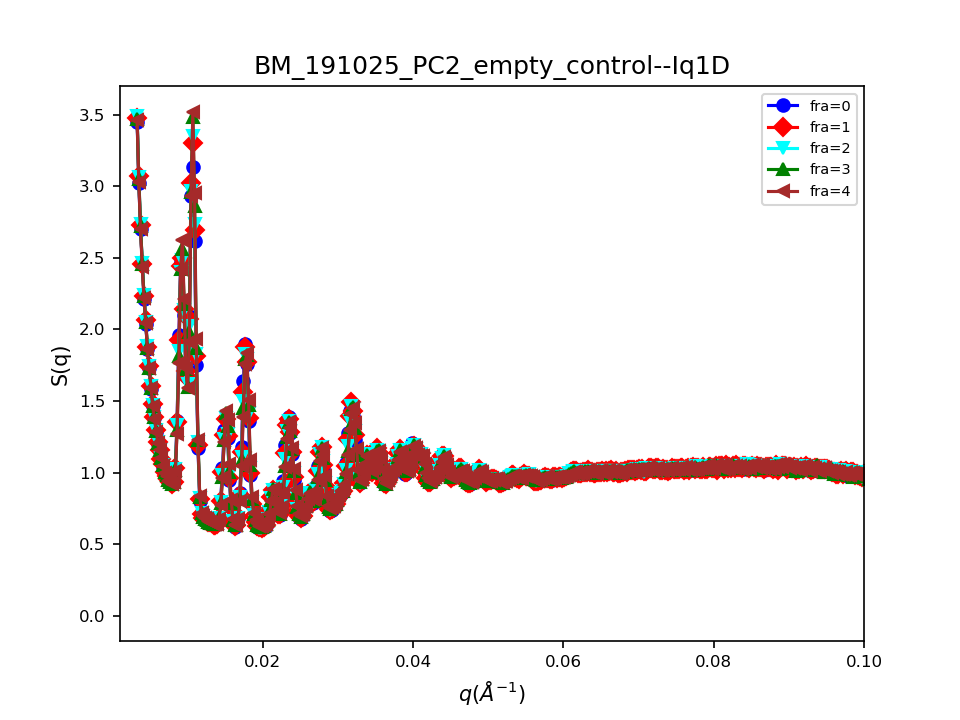

Text(0, 0.5, 'S(q)')

In [13]:
N = sqs.shape[1]
fig = plt.figure()
ax = fig.add_subplot( 111 ) 
i = 0
for j in range( N ) [0:5]:
    q = q
    #sq = np.abs( sqs[:,j] - a )
    sq =   sqs[:,j]  
    plot1D( x= q, y=sq, m=  markers[i], c= colors[i], ax=ax, legend= 'fra=%s'%j, legend_size = 7, logy= False  )
    i+=1    
ax.set_xlim( [0.001, 0.1 ])
#ax.set_ylim( [ 5e-1, .2e4])
ax.set_title( uid + '_%s--Iq1D'%md[uid][0] )
ax.set_xlabel(r'$q (\AA^{-1})$')
ax.set_ylabel('S(q)')

 


# Do a fitting of the first peak

In [14]:
q1, q2 =  0.008, 0.01
print(q1,q2)
fits = np.zeros( [N, 4]) #store fit results with q0, width, peak height, R2

0.008 0.01


The fit goodness of curve:0 is: 0.98960


<IPython.core.display.Javascript object>


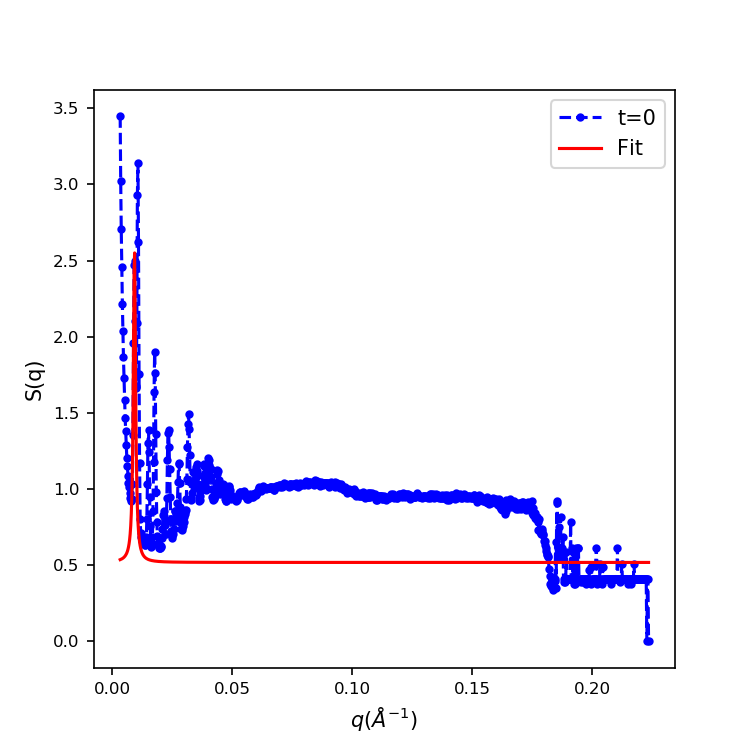

The fit goodness of curve:1 is: 0.98996
The fit goodness of curve:2 is: 0.99175
The fit goodness of curve:3 is: 0.99277
The fit goodness of curve:4 is: 0.99389
The fit goodness of curve:5 is: 0.99381
The fit goodness of curve:6 is: 0.99480
The fit goodness of curve:7 is: 0.99515
The fit goodness of curve:8 is: 0.99541
The fit goodness of curve:9 is: 0.99630
The fit goodness of curve:10 is: 0.99703
The fit goodness of curve:11 is: 0.99720
The fit goodness of curve:12 is: 0.99818
The fit goodness of curve:13 is: 0.99821
The fit goodness of curve:14 is: 0.99803
The fit goodness of curve:15 is: 0.99778
The fit goodness of curve:16 is: 0.99717
The fit goodness of curve:17 is: 0.99708
The fit goodness of curve:18 is: 0.99730
The fit goodness of curve:19 is: 0.99719
The fit goodness of curve:20 is: 0.99691
The fit goodness of curve:21 is: 0.99793
The fit goodness of curve:22 is: 0.99783
The fit goodness of curve:23 is: 0.99782
The fit goodness of curve:24 is: 0.99795
The fit goodness of curve

<IPython.core.display.Javascript object>


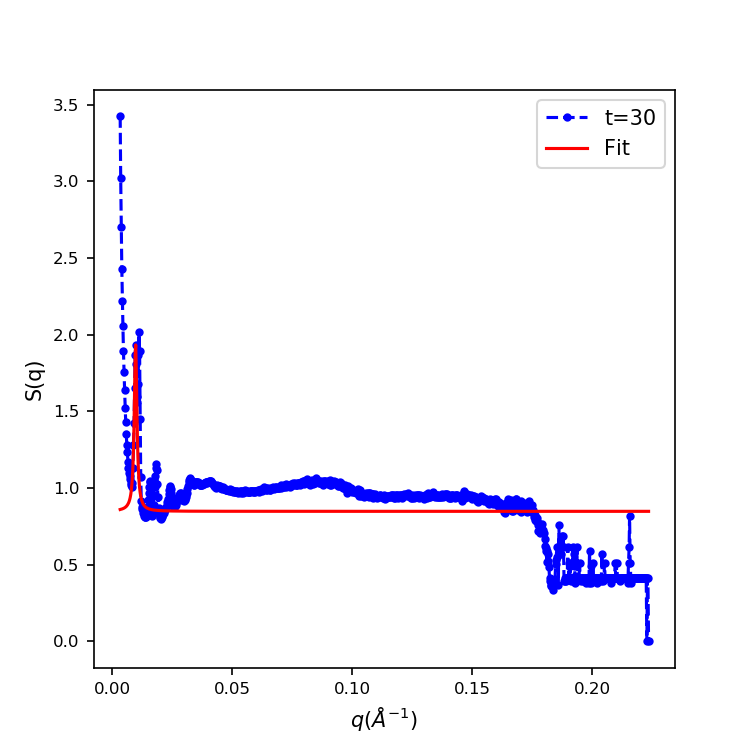

The fit goodness of curve:31 is: 0.99651
The fit goodness of curve:32 is: 0.99668
The fit goodness of curve:33 is: 0.99644
The fit goodness of curve:34 is: 0.99581
The fit goodness of curve:35 is: 0.99440
The fit goodness of curve:36 is: 0.99376
The fit goodness of curve:37 is: 0.99388
The fit goodness of curve:38 is: 0.99259
The fit goodness of curve:39 is: 0.99189
The fit goodness of curve:40 is: 0.99254
The fit goodness of curve:41 is: 0.99243
The fit goodness of curve:42 is: 0.98944
The fit goodness of curve:43 is: 0.99191
The fit goodness of curve:44 is: 0.99135
The fit goodness of curve:45 is: 0.99012
The fit goodness of curve:46 is: 0.98806
The fit goodness of curve:47 is: 0.98095
The fit goodness of curve:48 is: 0.98321
The fit goodness of curve:49 is: 0.97810
The fit goodness of curve:50 is: 0.98207
The fit goodness of curve:51 is: 0.98970
The fit goodness of curve:52 is: 0.97926
The fit goodness of curve:53 is: 0.97800
The fit goodness of curve:54 is: 0.97733
The fit goodness

In [17]:
a =  300
q0= 0.009
sigma= 0.001

b= 1
i=0
for j in range( N ) [:]:    
    x = q 
    y =   sqs[:,j] 
    popt,peff, xf, yf, R2 = fit_curve(x, y, p0=[a,q0,sigma,b],  xrange = [q1,q2], func='L', verbose= False )  
    a,qc,wid,b =  popt
    #print(    )
    fits[j] = [ abs(qc), 2*abs(wid), _1Lorentzian( abs(qc), *popt), R2    ]
    print( 'The fit goodness of curve:%s is: %.5f'%( j, R2 ) )
    if True: #True:#False:
        if j%30==0:
            fig, ax = plt.subplots( figsize=[5,5])
            #qind = 6
            plot1D(   x = x, y= y , m= markers[i], markersize=3,
                       ls='--', c= colors[i],  ax=ax, legend= 't=%s'%j )
            plot1D(   x = x, y= _1Lorentzian(x, *popt)  , m= '',
                       ls='-', c= 'r',  ax=ax, legend= 'Fit' )
            #ax.set_xlim( 0.01, 0.1 )   
            #ax.set_xlim( 22.5, 40 )  
            ax.set_xlabel(r'$q (\AA^{-1})$')
            ax.set_ylabel('S(q)')
            ax.set_title('')
            ax.legend(loc='upper right')

In [18]:
if False:
    fig  = plt.figure( figsize=[6,5])
    i=0
    ax = fig.add_subplot( 111)
    x = np.arange(N) * md[uid][1]
    y =  fits[:,3 ]
    plot1D(   x = x, y= y , m= markers[i], markersize=3, ls='--', c= colors[i],# ylim=[0.5,1],
           ax=ax, legend= 'R2', title=''  )
    ax.set_xscale('log')
    ax.set_xlabel(r'$t (s)$')
    ax.set_ylabel('R2')
    ax.set_title('fit goodness')
            

<IPython.core.display.Javascript object>


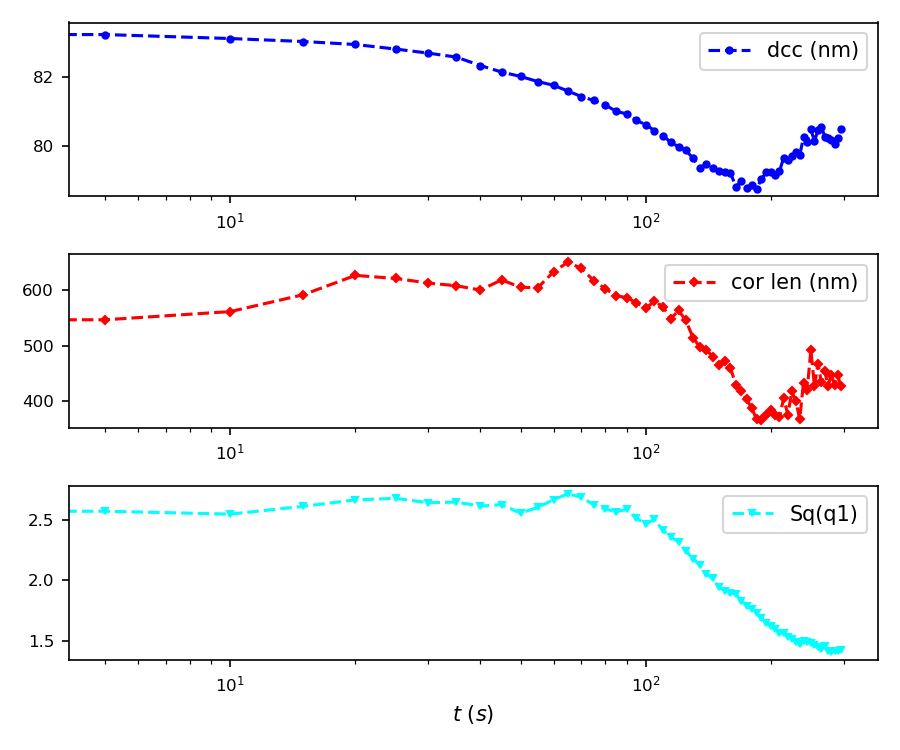

In [19]:
fig  = plt.figure( figsize=[6,5])

i=0
ax = fig.add_subplot( 311)
x = np.arange(N) * md[uid][1]
dcc = np.sqrt( 6) * np.pi/fits[:,0]/10
plot1D(   x = x, y= dcc , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'dcc (nm)', title=''  )
ax.set_xscale('log')

i+=1
ax = fig.add_subplot( 312) 
cl= 2*np.pi/fits[:,1]/10
plot1D(   x = x, y= cl , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'cor len (nm)', title=''  )
ax.set_xscale('log')

i+=1
ax = fig.add_subplot( 313) 
h1= fits[:,2]
plot1D(   x = x, y= h1 , m= markers[i], markersize=3, ls='--', c= colors[i],  ax=ax, legend= 'Sq(q1)', title=''  )

ax.set_xlabel(r'$t\ (s) $')
#ax.set_ylabel('S(q)')
ax.set_title('')
ax.set_xscale('log')

plt.tight_layout()


# Do correlation to evaluation beam damage

In [20]:
xrange= [ 0.006, 0.1]
#xragne=None



In [21]:
ca = get_2D_corMatrix( sqs,  q=q, xrange=xrange, type= 'cor' )
cb = get_2D_corMatrix( sqs,  q=q, xrange=xrange, type= 'cor_1st' )


## For correlation of Sq

<IPython.core.display.Javascript object>


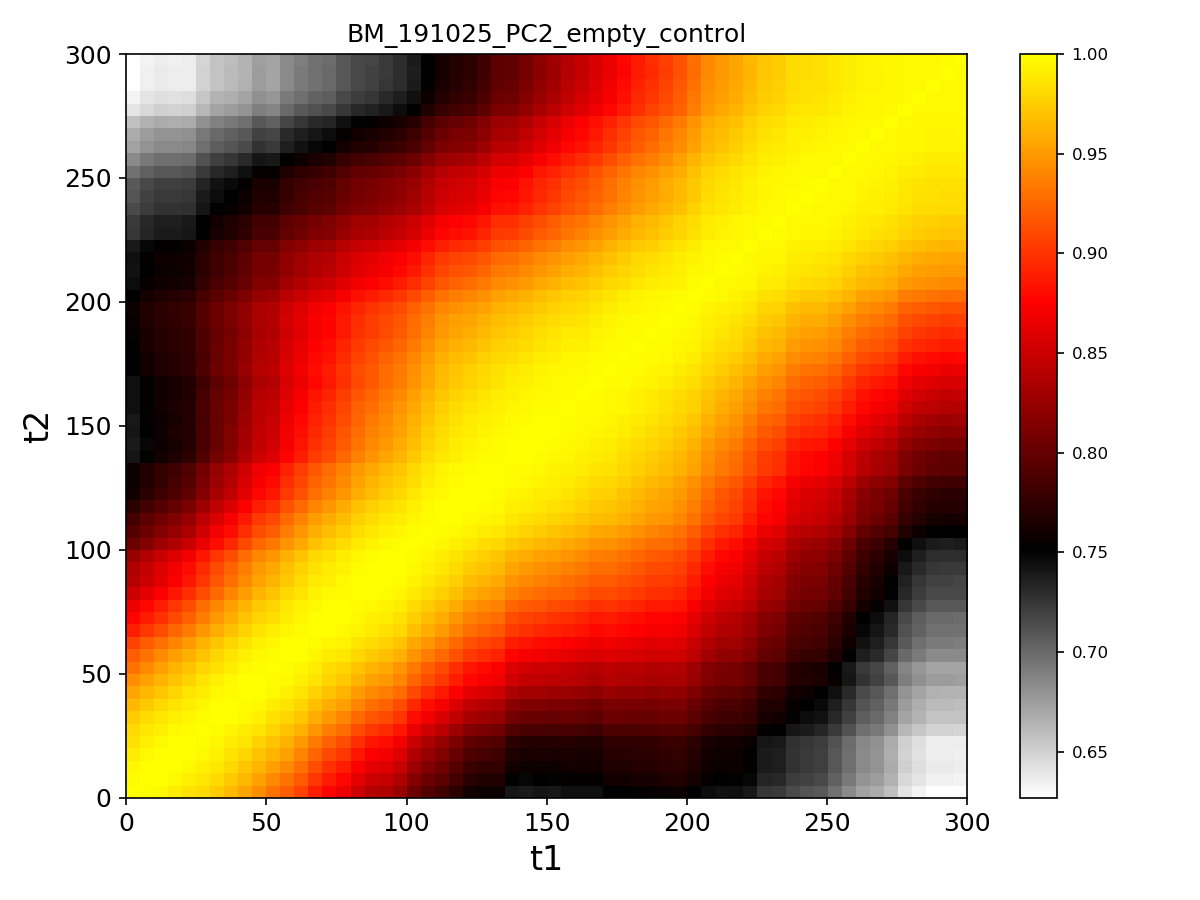

In [22]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( ca, # vmin = 1-0.005, vmax=1.0,  #vmin= A - .2 * D, vmax= A + .2 * D,
         #vmin=0.25, vmax=1.0,
          ax= [fig,ax], show_colorbar=True,
          extent=[ 0,   md[uid][1] * md[uid][2]  , 0, md[uid][1] * md[uid][2] ]  ,    
          xlabel= 't1', ylabel='t2',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_TT_Sq_%s.png'%(uid, md[uid][0] ))



## Fit time decay

In [27]:
beta, gama, alpha, base = 1, 0.05, 1, 0  
p0=[beta, gama, alpha, base]

y= np.average(  ca[0:1], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
popt, pcov = curve_fit( decay_fit_func, x[:], y[:] , 
                       p0= p0,bounds=( [.5,  0.001,   0.5,   -.2],[1.2,   100,    2.5,  .5]) )

perr = np.sqrt(np.diag(pcov))
beta, gama, alpha, base = popt
beta_, gama_, alpha_, base_ = perr
popt, perr

(array([0.53488745, 0.00438749, 0.86524169, 0.5       ]),
 array([0.15715921, 0.00227057, 0.17465469, 0.14498422]))

<IPython.core.display.Javascript object>


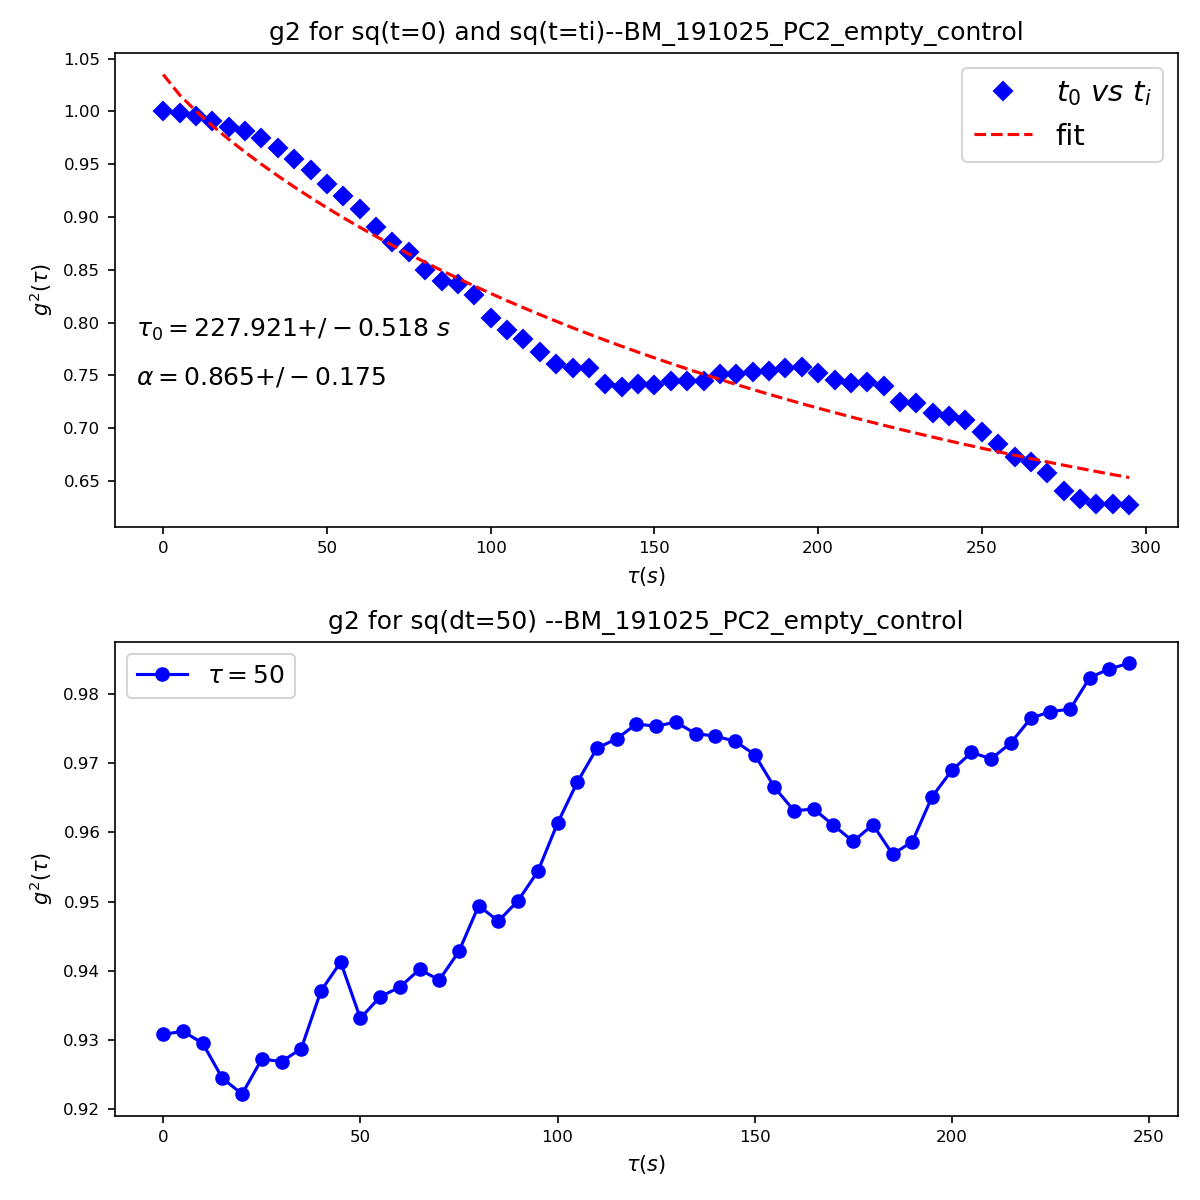

In [28]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]

i+=1
### Plot the correlation between t0 and ti
y= np.average(  ca[0:1], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m= 'D',c='b',ax=ax,legend= r'$t_0\ vs\  t_i$' , legend_size = 14,logx= True, logy= False,ls=''  ) 

y= decay_fit_func(x, *popt)
plot1D(x =x,y=y, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

px=.02;py=.5;dt=.1
txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gama)  + r'$ +/- %.3f\ s$'%(   gama_/gama )  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
dt +=0.1;
txts = r'$\alpha$' + r'$ = %.3f$'%(alpha)  + r'$ +/- %.3f$'%(alpha_)  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for sq(t=0) and sq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')

#ax.set_xscale('log')
ax.set_xscale('linear')

ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
diak =  10
y =  np.diag( ca, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  

ax.set_xscale('linear')

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for sq(dt=%s) --'%(diak* md[uid][1]) + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_Sq_%s.png'%(uid, md[uid][0] ))


# plot with p1 fitting

<IPython.core.display.Javascript object>


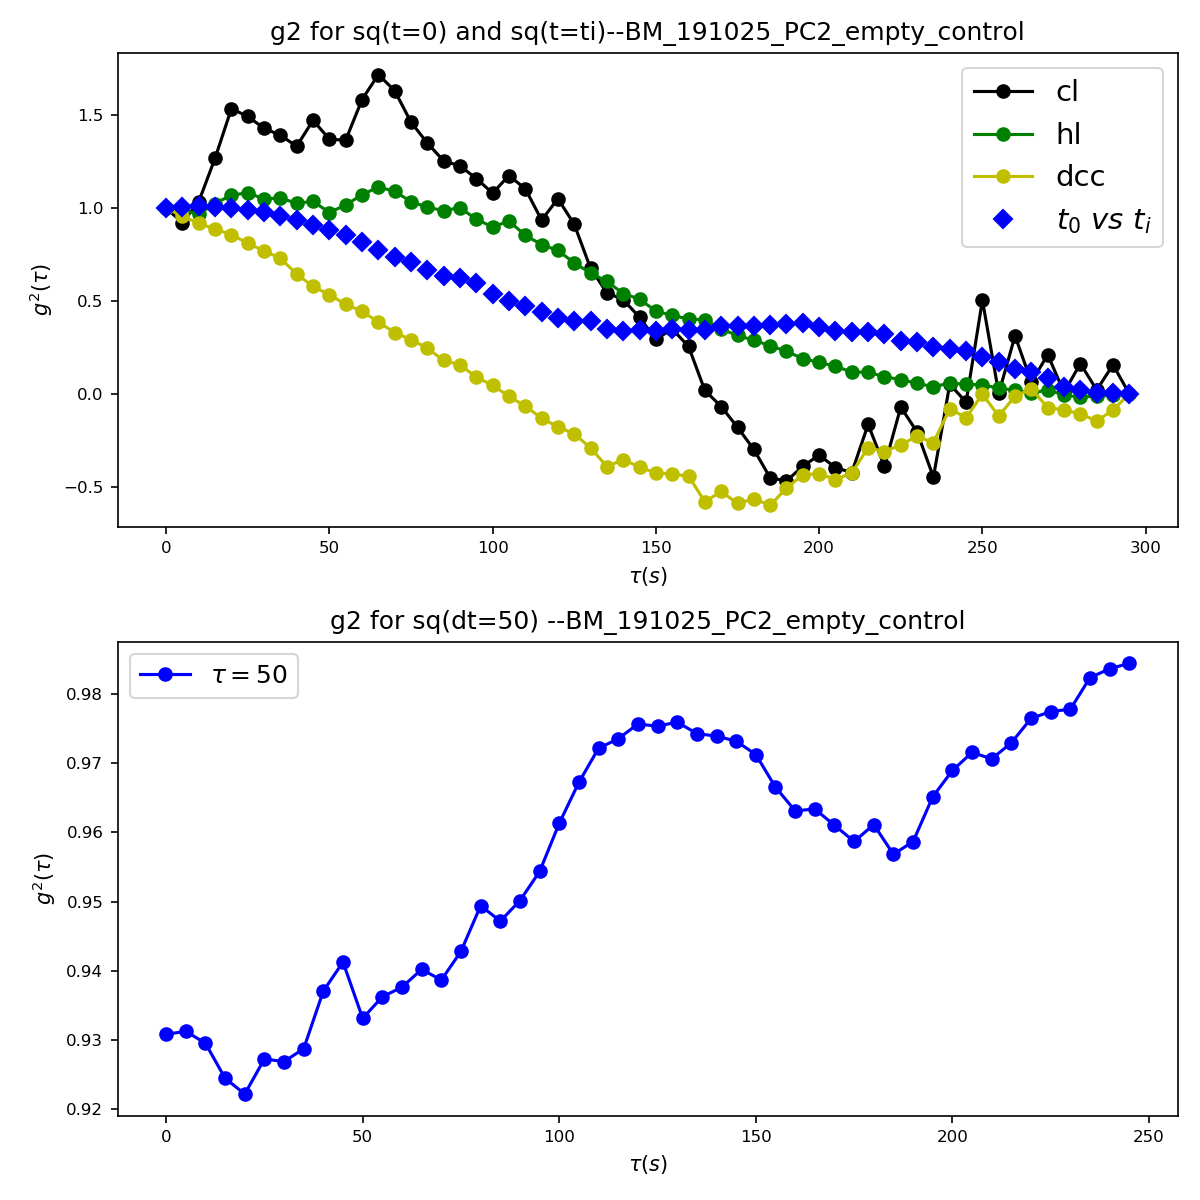

In [29]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]
#qind = find_index( q, 0.0214)

if True:
    qind = find_index( q, 0.0237)
    y=sqs[qind]    
    y= cl
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y= yi, m=  'o', c= 'k', ax=ax, legend= 'cl', legend_size = 7, logx= True, logy= False  ) 
    y= h1
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'g', ax=ax, legend= 'hl', legend_size = 7, logx= True, logy= False  )  
    y= dcc
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D( x= x, y=yi, m=  'o', c= 'y', ax=ax, legend= 'dcc', legend_size = 7, logx= True, logy= False  ) 



i+=1
### Plot the correlation between t0 and ti
y= np.average(  ca[0:5], axis=0 )
yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=yi,m= 'D',c='b',ax=ax,legend= r'$t_0\ vs\  t_i$' , legend_size = 14,logx= True, logy= False,ls=''  ) 

if False:
    y= decay_fit_func(x, *popt)
    yi = ( y - y[-1] )/ ( y[0] - y[-1 ])
    plot1D(x =x,y=yi, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

    px=.02;py=.5;dt=.1
    txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gama)  + r'$ +/- %.3f\ s$'%(   gama_/gama )  
    ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
    dt +=0.1;
    txts = r'$\alpha$' + r'$ = %.3f$'%(alpha)  + r'$ +/- %.3f$'%(alpha_)  
    ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for sq(t=0) and sq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')

#ax.set_xscale('log')
ax.set_xscale('linear')

ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
#diak =  50
y =  np.diag( ca, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  

ax.set_xscale('linear')

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for sq(dt=%s) --'%(diak* md[uid][1]) + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_Sq_%s.png'%(uid, md[uid][0] ))


## For correlation of diff(Sq)

<IPython.core.display.Javascript object>


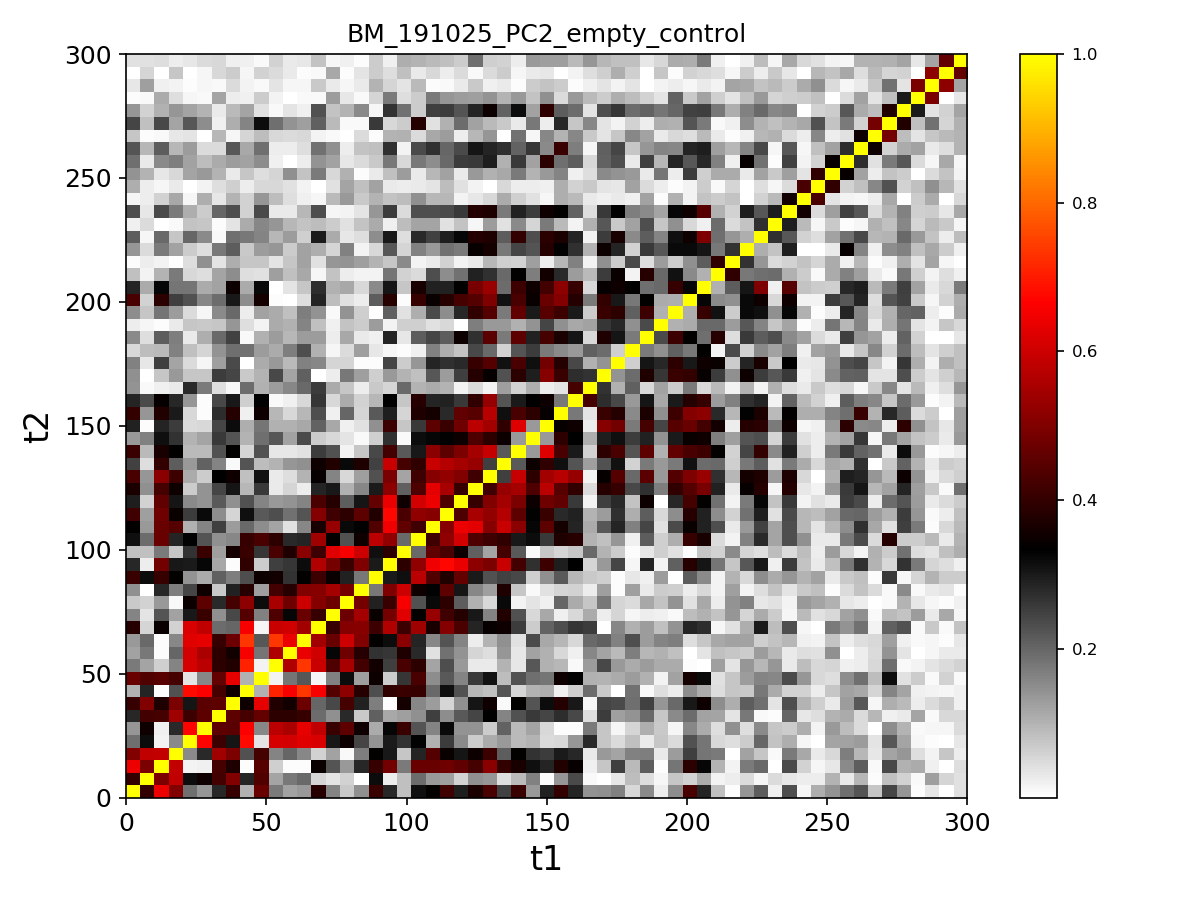

In [30]:
fig, ax = plt.subplots( figsize= [8,6])

show_img( cb, # vmin = 1-0.005, vmax=1.0,  #vmin= A - .2 * D, vmax= A + .2 * D,
          ax= [fig,ax], show_colorbar=True,
          extent=[ 0,   md[uid][1] * md[uid][2]  , 0, md[uid][1] * md[uid][2] ]  ,    
          xlabel= 't1', ylabel='t2',   cmap =  cmap_albula, )
         #cmap=cmap_hdr_goldish )
ax.set_title( uid + '_%s'%md[uid][0] )
plt.savefig( plotDir + 'uid=%s_TT_DiffSq_%s.png'%(uid, md[uid][0] ))

In [31]:
beta, gama, alpha, base = 1, 0.05, 1, 0  
p0=[beta, gama, alpha, base]

y= np.average(  cb[0:5], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
poptb, pcovb = curve_fit( decay_fit_func, x[:], y[:] , 
                       p0= p0,bounds=( [.5,  0.001,   0.5,   -.2],[1.2,   100,    2.5,  .5]) )

perrb = np.sqrt(np.diag(pcovb))
betab, gamab, alphab, baseb = poptb
betab_, gamab_, alphab_, baseb_ = perrb
poptb, perrb

(array([ 0.79032235,  0.00399335,  0.53747997, -0.2       ]),
 array([0.64988231, 0.00948364, 0.27030847, 0.61586343]))

<IPython.core.display.Javascript object>


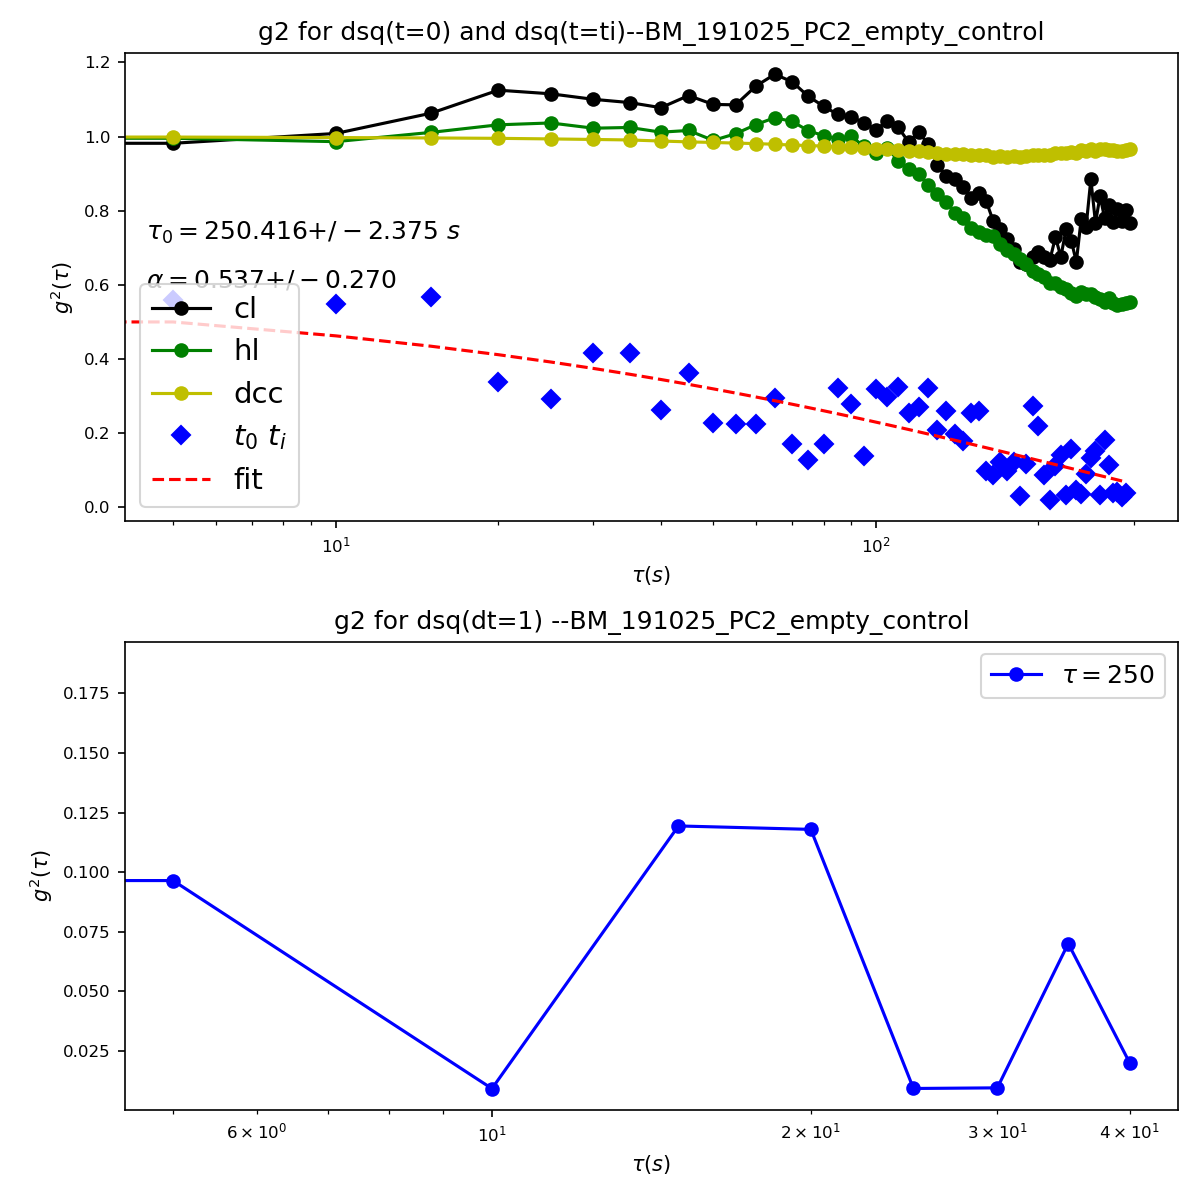

In [32]:
fig = plt.figure( figsize=[ 8,8 ])
ax = fig.add_subplot( 211 ) 

i = 0
x= np.arange( md[uid][2] ) *  md[uid][1]
#qind = find_index( q, 0.0214)
y= cl
plot1D( x= x, y=y/y[0], m=  'o', c= 'k', ax=ax, legend= 'cl', legend_size = 7, logx= True, logy= False  )   

y= h1
plot1D( x= x, y=y/y[0], m=  'o', c= 'g', ax=ax, legend= 'hl', legend_size = 7, logx= True, logy= False  )   

y= dcc
plot1D( x= x, y=y/y[0], m=  'o', c= 'y', ax=ax, legend= 'dcc', legend_size = 7, logx= True, logy= False  )   

i+=1
### Plot the correlation between t0 and ti
y= np.average(  cb[0:5], axis=0 )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m= 'D',c='b',ax=ax,legend=r'$t_0~t_i$', legend_size = 7,logx= True, logy= False,ls=''  ) 

y= decay_fit_func(x, *poptb)
plot1D(x =x,y=y, m='',c= 'r',ax=ax,legend='fit',legend_size = 14,logx= True, logy= False , ls='--' ) 

px=.02;py=.7;dt=.1
txts = r'$\tau_0$' + r'$ = %.3f$'%(1/gamab)  + r'$ +/- %.3f\ s$'%(   gamab_/gamab )  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)
dt +=0.1;
txts = r'$\alpha$' + r'$ = %.3f$'%(alphab)  + r'$ +/- %.3f$'%(alphab_)  
ax.text(x =px, y= py-dt, s=txts, fontsize=12, transform=ax.transAxes)

#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
ax.set_title( 'g2 for dsq(t=0) and dsq(t=ti)--' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')


ax = fig.add_subplot( 212 ) 
i = 0

### Plot the correlation between ti and ti+1  
diak = 50 
y =  np.diag( cb, k= diak )
x = np.arange(len(y)) *  md[uid][1]
plot1D(x=x, y=y,m=  markers[i],c=colors[i],ax=ax,legend=r'$\tau=%s$'%(diak* md[uid][1]), legend_size = 12,logx= True, logy= False  )  


#ax.set_xlim( [0.01, 0.1 ])
#ax.set_ylim( [ 1-500e-3, 1.01 ])
#ax.set_title( uid + '_%s'%md[uid][0] )
ax.set_title( 'g2 for dsq(dt=1) --' + uid + '_%s'%md[uid][0] )
ax.set_xlabel(r'$\tau (s)$')
ax.set_ylabel(r'$g^2(\tau)$')
plt.tight_layout()

plt.savefig( plotDir + 'uid=%s_g2_dSq_%s.png'%(uid, md[uid][0] ))


# The End